In [1]:
# pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("employee_records.csv")

In [4]:
df.head(10)

,Employee_ID,Employee_Name,Age,Country,Department,Position,Salary,Joining_Date
0,1,Daniel Taylor,25,UK,HR,Analyst,142278.32,2023-06-04
1,2,Ethan Brown,44,India,Marketing,Executive,98549.20,2018-01-13
2,3,Sophia Martinez,51,Japan,Finance,Developer,85565.84,2015-04-30
3,4,Ethan Martinez,47,Germany,Support,Analyst,34513.67,2015-06-17
4,5,Mia Brown,32,Australia,Support,Consultant,45339.72,2019-02-22
5,6,Ava Moore,35,Japan,HR,Executive,90973.25,2018-09-29
6,7,Mason Brown,48,UK,Finance,Assistant,58227.95,2021-08-24
7,8,Mason Anderson,45,USA,Finance,Manager,147839.10,2021-01-08
8,9,Sophia Wilson,40,Brazil,Marketing,Developer,126394.86,2018-12-20
9,10,Ava Martinez,40,India,Sales,Manager,119828.28,2018-05-18


In [5]:
df.shape

(30000, 8)

### 1. Get all records of employees from the UK.

In [6]:
df[df['Country'] == "UK"]

,Employee_ID,Employee_Name,Age,Country,Department,Position,Salary,Joining_Date
0,1,Daniel Taylor,25,UK,HR,Analyst,142278.32,2023-06-04
6,7,Mason Brown,48,UK,Finance,Assistant,58227.95,2021-08-24
20,21,Sophia Brown,49,UK,Finance,Consultant,68754.50,2022-08-24
29,30,Sophia Martinez,52,UK,Sales,Manager,138677.05,2022-08-03
65,66,Logan Brown,59,UK,Sales,Manager,91702.79,2020-07-14
...,...,...,...,...,...,...,...,...
29952,29953,Mason Wilson,24,UK,Engineering,Analyst,39309.52,2019-06-06
29959,29960,Ava Taylor,45,UK,HR,Developer,32171.67,2018-08-13
29974,29975,Ava Martinez,42,UK,Support,Consultant,31018.49,2021-05-02
29977,29978,Mia Jackson,27,UK,HR,Developer,33272.65,2016-04-27


### 2. Retrieve the list of distinct departments.

In [7]:
df['Department'].unique().tolist()

['HR', 'Marketing', 'Finance', 'Support', 'Sales', 'Engineering']

### 3. Count total employees by country.

In [8]:
emp_by_country = df['Country'].value_counts()
emp_by_country

Country
Germany      3090
Australia    3052
UK           3021
France       3010
Mexico       2991
India        2985
Canada       2969
USA          2967
Brazil       2961
Japan        2954
Name: count, dtype: int64

<Axes: title={'center': 'Employee Count BY Country'}, xlabel='Country'>

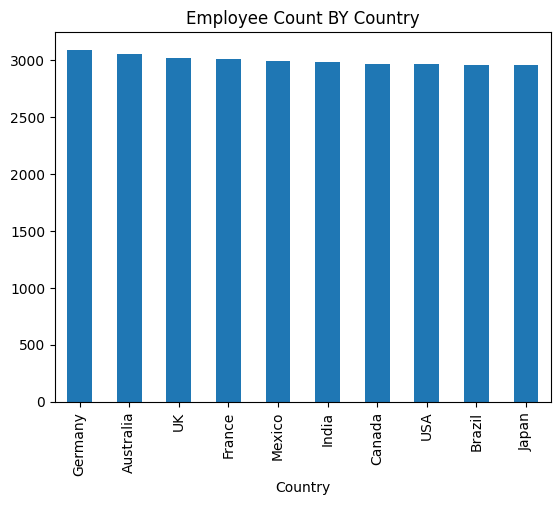

In [9]:
emp_by_country.plot(kind='bar', title='Employee Count BY Country')

### 💼 4. Find the Average Salary of Employees in Each Department

To analyze salaries by department, we use the following steps:

- **`groupby('Department')`** → groups data by department  
- **`['Salary'].mean()`** → calculates average salary within each group  
- **`round()`** → round off the numbers  
- **`sort_values()`** → sorts to easily see highest-paying departments  
- **`apply(int)`** → cast the numbers to integer  

📊 This gives a clear overview of which departments pay the most!

In [10]:
avg_salary_by_dept = df.groupby('Department')\
                        ['Salary'].mean()\
                        .round()\
                        .sort_values(ascending=False)\
                        .apply(int)
avg_salary_by_dept

Department
Support        90649
Engineering    90160
HR             89930
Marketing      89834
Finance        89527
Sales          88854
Name: Salary, dtype: int64

### 5. Show the top 10 highest-paid employees.

In [11]:
df.sort_values(by='Salary', ascending=False).head(10)

,Employee_ID,Employee_Name,Age,Country,Department,Position,Salary,Joining_Date
23665,23666,Mason Taylor,38,Germany,Sales,Developer,149996.39,2019-02-19
4445,4446,Lucas Martinez,42,Germany,HR,Developer,149995.00,2022-01-28
17204,17205,Ethan Moore,40,France,HR,Manager,149994.40,2023-10-28
21967,21968,Ava Wilson,54,Japan,Engineering,Analyst,149989.60,2019-08-18
10465,10466,Mason Wilson,38,Germany,Engineering,Consultant,149989.17,2023-07-28
1031,1032,Logan Hernandez,41,Japan,Engineering,Developer,149988.02,2018-12-05
29608,29609,Mia Brown,52,Germany,Sales,Analyst,149987.06,2016-04-16
17269,17270,Mia Moore,60,Canada,Sales,Developer,149984.83,2020-04-24
3534,3535,Daniel Thomas,55,Japan,HR,Developer,149983.66,2022-05-12
17629,17630,Sophia Thomas,37,India,Sales,Executive,149979.37,2024-12-16


### 6. `df.info()`, `df.describe()`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee_ID    30000 non-null  int64  
 1   Employee_Name  30000 non-null  object 
 2   Age            30000 non-null  int64  
 3   Country        30000 non-null  object 
 4   Department     30000 non-null  object 
 5   Position       30000 non-null  object 
 6   Salary         30000 non-null  float64
 7   Joining_Date   30000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.8+ MB


In [13]:
df.describe()

,Employee_ID,Age,Salary
count,30000.000000,30000.000000,30000.000000
mean,15000.500000,40.978067,89826.142610
std,8660.398374,11.234432,34625.270533
min,1.000000,22.000000,30004.780000
25%,7500.750000,31.000000,59546.715000
50%,15000.500000,41.000000,89544.810000
75%,22500.250000,51.000000,119836.545000
max,30000.000000,60.000000,149996.390000


### 7. Count missing values per column.

In [14]:
df.isnull().sum()

Employee_ID      0
Employee_Name    0
Age              0
Country          0
Department       0
Position         0
Salary           0
Joining_Date     0
dtype: int64

### 8. Plot age distribution (histogram).

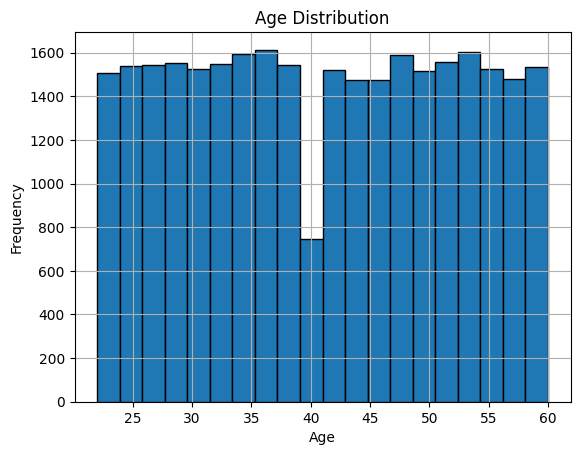

In [15]:
# fig, ax = plt.subplots(figsize=(12, 9))

# # Plot histogram
# n, bins, patches = ax.hist(df['Age'], bins=20, edgecolor='black')

# # Add labels on top of each bin
# for count, x in zip(n, bins):
#     if count > 0:  # Only label non-empty bins
#         ax.text(x + (bins[1]-bins[0])/2, count, int(count),
#                 ha='center', va='bottom', fontsize=9)

# ax.set_title('Age Distribution')
# ax.set_xlabel('Age')
# ax.set_ylabel('Frequency')

# plt.show()


df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()